### Statistical Analysis for E-news Express.

In [2]:
# import libraries
import pandas as pd
import seaborn as sns

### Dataset Exploration Using Exploratory Data Analysis

In [3]:
# View the 1st 5 rows of the dataset using the user_id as the index
test = pd.read_csv('abtest.csv', index_col='user_id')
test.head(5)

,group,landing_page,time_spent_on_the_page,converted,language_preferred
user_id,,,,,
546592,control,old,3.48,no,Spanish
546468,treatment,new,7.13,yes,English
546462,treatment,new,4.40,no,Spanish
546567,control,old,3.02,no,French
546459,treatment,new,4.75,yes,Spanish


In [8]:
# Check the number of rows and columns present in the data using the shape attribute
print('The shape of the dataset is :', test.shape)

The shape of the dataset is : (100, 5)


In [9]:
# use describe method to explore the statistical summary for the dataset
print ("The Statistical Summary of the dataset is: \n ")
test.describe()

The Statistical Summary of the dataset is: 
 


,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


In [13]:
# list all groups based on random sample
print("The groups are : {}".format(test['group'].unique().tolist()))

The groups are : ['control', 'treatment']


In [16]:
# get numbers of users per group
print("The number of users per group is : \n ")
test['group'].value_counts()

The number of users per group is : 
 


treatment    50
control      50
Name: group, dtype: int64

In [17]:
# get mean time spent for each group
Group=test.groupby(["group"]).mean()
Group

,time_spent_on_the_page
group,
control,4.5324
treatment,6.2232


In [18]:
# get total time spent for each group
Group=test.groupby(["group"]).sum()
Group

,time_spent_on_the_page
group,
control,226.62
treatment,311.16


### The users spend more time on the the new landing page than the old landng page.

In [19]:
# get group's maximum convertion rate based on time
Group=test.groupby(["group"]).max()
Group

,landing_page,time_spent_on_the_page,converted,language_preferred
group,,,,
control,old,10.30,yes,Spanish
treatment,new,10.71,yes,Spanish


In [20]:
# get group's min convertion rate based on time
Group=test.groupby(["group"]).min()
Group

,landing_page,time_spent_on_the_page,converted,language_preferred
group,,,,
control,old,0.19,no,English
treatment,new,1.65,no,English


In [21]:
# contigency table using crosstab() to know what language the converted status depends on
pd.crosstab(test.language_preferred, test.converted, margins = True, margins_name = "Total")

converted,no,yes,Total
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
Total,46,54,100


### English has the highest number of users that converted and French has the least. 
### The converted status of the users are higher and are dependent on the preferred language

In [10]:
# get the mean time spent on the different pages for the different language users
pd.crosstab(test.language_preferred, test.landing_page, values = test.time_spent_on_the_page, aggfunc = "mean")

landing_page,new,old
language_preferred,,
English,6.663750,4.454375
French,6.196471,4.310000
Spanish,5.835294,4.828235


### The mean time spent on the new page for the differnt language users is not the same

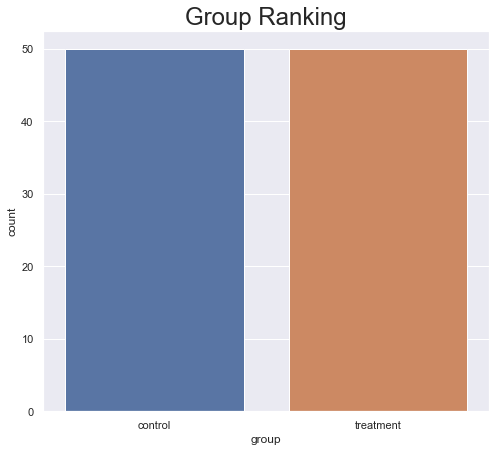

In [11]:
# plot showing group ranking
sns.countplot(x = 'group', data = test).set_title('Group Ranking', size = 24)
sns.set(rc={'figure.figsize':(8, 7)})

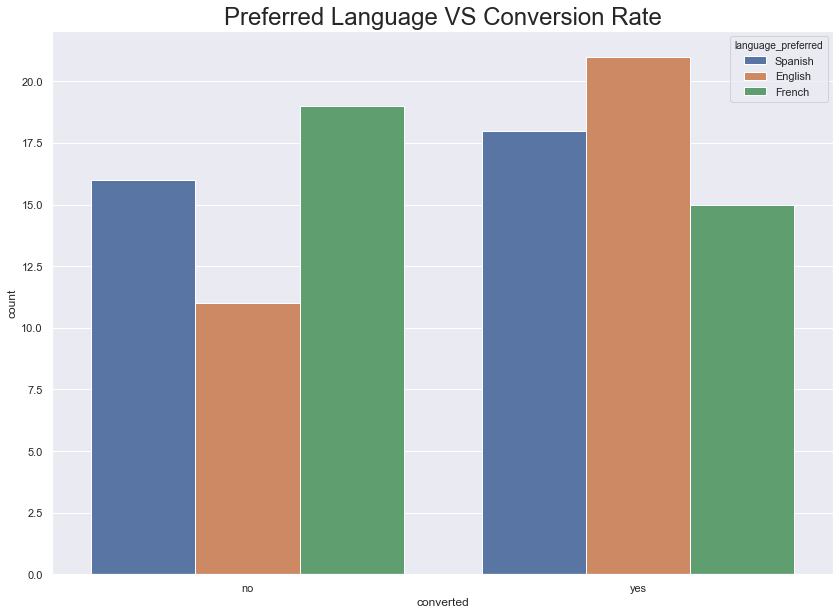

In [16]:
# plot showing conversion rate based on preferred language.
sns.countplot(x = "converted", hue ='language_preferred', data = test).set_title('Preferred Language VS Conversion Rate', size = 24)
sns.set(rc={'figure.figsize':(14,10)})

### This confirms that English has the highest number of users that converted and French has the least. 

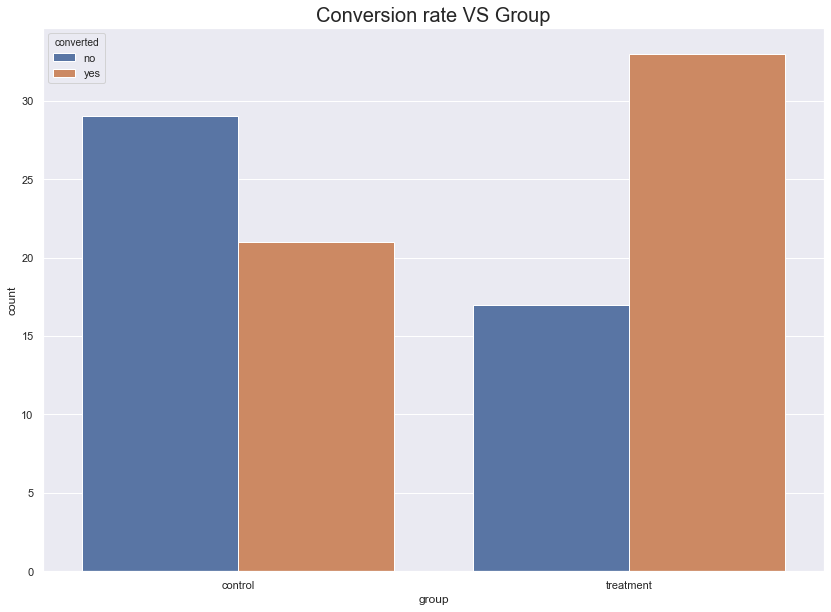

In [17]:
# plot showing Conversion rate VS Group
sns.countplot(x = "group", hue ='converted', data = test).set_title('Conversion rate VS Group', size = 20)
sns.set(rc={'figure.figsize':(14,10)})

### This confirms that there are more converted users for the new landing page (treatment) than the old landing page (control).